## NOTES 
#### BMI is body to weight ratio
1) BMI categories 
* Underweight: Below 18.5 
* Normal weight: 18.5 to 24.9 
* Overweight: 25 to 29.9 
* Obese: 30 or greater 
#### Diabetes Pedigree function 
In datasets related to diabetes prediction, "DiabetesPedigreeFunction" (DPF) refers to a measure of the likelihood of a person having diabetes based on their family history of the disease. It's a score that ranges from 0.08 to 2.42, with higher values suggesting a greater chance of diabetes.

## STEPS I WILL TAKE 

* Remove outliers and other null values , 
* perform EDA analysis 
* Split the data into training , testing dataset , 
* Handling imbalanced dataset 
* Perform Feature Scaling and Feature Selection 
* Use machine learning algorithms 
* check for overfitting
* if overfitting exists , use regularization
* check the training data once more ! 

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [91]:
df = pd.read_csv("../dataset/diabetes.csv")

In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
df.shape

(768, 9)

In [94]:
# sns.heatmap(data=df,x="Age",y="Outcome",annot=True)

In [95]:
df.shape

(768, 9)

In [96]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin'>

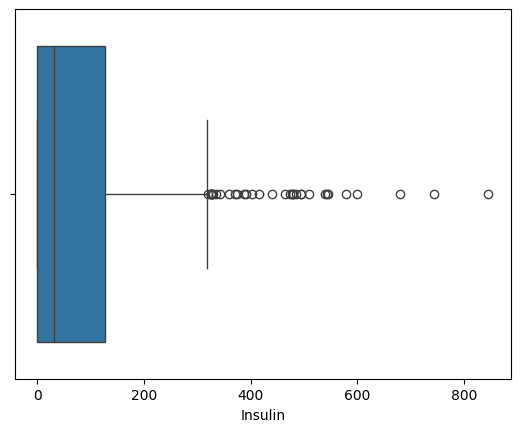

In [98]:
sns.boxplot(x="Insulin",data=df)

In [99]:
#removing outliers form insulin 

In [100]:
### USING QUARTILE

In [101]:
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)


In [102]:
IQR = q3 - q1

In [103]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)

In [104]:
min_range,max_range

(-190.875, 318.125)

In [105]:
filtered_df = df[df["Insulin"] < 318.125]

In [106]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Insulin'>

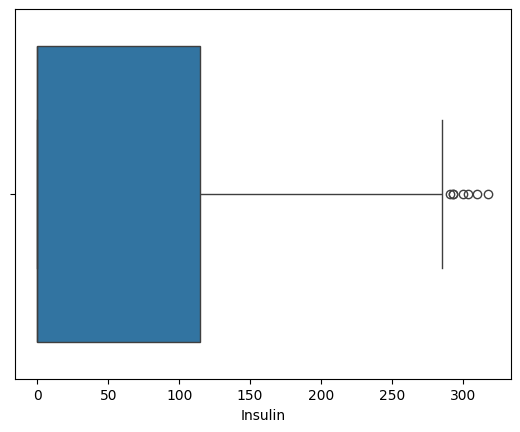

In [108]:
sns.boxplot(x="Insulin",data=filtered_df)

In [109]:
### USING MEAN AND STD

In [110]:
min_range = df["Insulin"].mean() - (3*df["Insulin"].std())
max_range = df["Insulin"].mean() + (3*df["Insulin"].std())

In [111]:
min_range,max_range

(-265.9325278873484, 425.53148622068176)

In [112]:
filtered_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
filtered_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

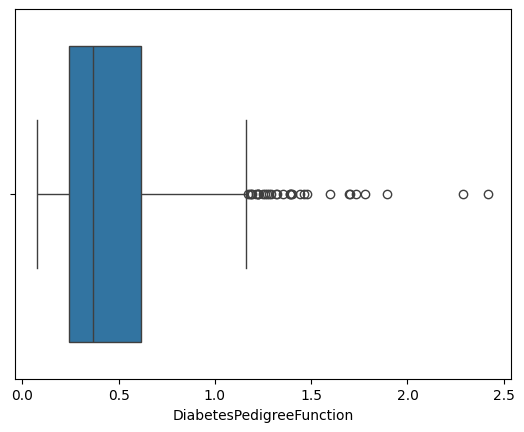

In [114]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [115]:
q1 = filtered_df["DiabetesPedigreeFunction"].quantile(0.25)
q3 = filtered_df["DiabetesPedigreeFunction"].quantile(0.75)
IQR = q3 - q1 
IQR

0.37050000000000005

In [116]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)

In [117]:
min_range,max_range

(-0.3125000000000001, 1.1695000000000002)

In [118]:
filtered_df = filtered_df[filtered_df["DiabetesPedigreeFunction"] <= max_range]

In [119]:
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='DiabetesPedigreeFunction'>

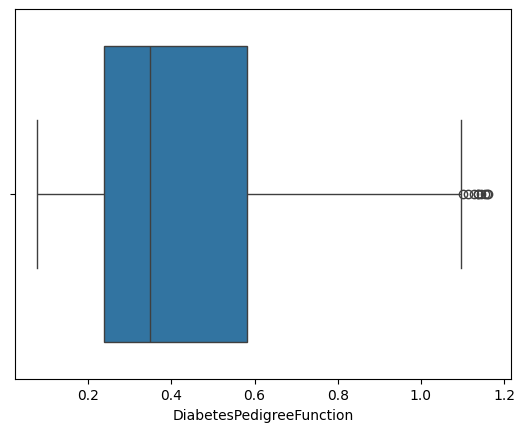

In [120]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [121]:
filtered_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.839260,118.477952,68.827881,19.779516,61.512091,31.802276,0.423461,33.136558,0.327169
std,3.362445,30.866993,19.849798,15.933928,78.591171,7.826713,0.243751,11.755273,0.469514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.237500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.349000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,111.000000,36.300000,0.582500,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,318.000000,67.100000,1.162000,81.000000,1.000000


In [138]:
filtered_df["Outcome"].value_counts()

Outcome
0    473
1    230
Name: count, dtype: int64

###    USING FEATURE SCALING

In [140]:
from sklearn.preprocessing import StandardScaler

In [143]:
ss = StandardScaler()

In [148]:
ss.fit(filtered_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])

StandardScaler()

In [149]:
transformed_data = ss.transform(filtered_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])

In [147]:
pd.DataFrame(filtered_df,columns=ss.transform(filtered_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]))

ValueError: Index data must be 1-dimensional

### Handling imbalanced datasets 

In [130]:
from imblearn.under_sampling import RandomUnderSampler

In [131]:
x = filtered_df.iloc[:,:-1]
y = filtered_df["Outcome"]
ru = RandomUnderSampler()
ru_x, ru_y = ru.fit_resample(x,y)

In [ ]:
ru_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
656,2,101,58,35,90,21.8,0.155,22
405,2,123,48,32,165,42.1,0.520,26
550,1,116,70,28,0,27.4,0.204,21
601,6,96,0,0,0,23.7,0.190,28
167,4,120,68,0,0,29.6,0.709,34
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
759,6,190,92,0,0,35.5,0.278,66
761,9,170,74,31,0,44.0,0.403,43


In [132]:
ru_y.value_counts()

Outcome
0    230
1    230
Name: count, dtype: int64